# Tone detection (via IBM Watson Cloud)

Supported "tones":
- anger
- fear
- joy
- sadness
- analytical
- confident
- tentative

## Installation

In [1]:
!pip install --upgrade "ibm-watson>=4.4.0"

     |████████████████████████████████| 368kB 2.7MB/s 
     |████████████████████████████████| 204kB 5.5MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-4.4.1-cp36-none-any.whl size=360253 sha256=d242283ce302669e82717f4d3a62284b539136b4e507a48e211c946038522744
  Stored in directory: /root/.cache/pip/wheels/73/21/91/61a59270c329be2edc947c69871c25c50bf7dd87ebbfe07cdc
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-1.5.1-cp36-none-any.whl size=44491 sha256=08d70898d4624763442aceebc305c2575a234f67c2d072487e164d1d972cfded
  Stored in directory: /root/.cache/pip/wheels/6a/42/50/f96888116b329578304f9dda4693cef6f3e76e18272d22cb6c
Successfully built ibm-watson ibm-cloud-sdk-core


## Authentication

This uses the [Watson Python SDK](https://github.com/watson-developer-cloud/python-sdk) and follows the [tone analysis tutorial](https://cloud.ibm.com/apidocs/tone-analyzer?code=python#analyze-general-tone). An example of the [Tone Analyzer](https://tone-analyzer-demo.ng.bluemix.net/) shows how this works.

Currently, we are using the Lite plan, which provides "2,500 API Calls per Month" for free. If we use this correctly, we can probably get the tone saved for all of our American Rhetoric data points.

Right now, we are using Rahul's credentials. If we run out of API calls, someone else can make a free Lite account, and we can use more API calls with the new credentials.

In [0]:
API_KEY = "fIdOvNyKFyGkw3BWRqtyory1iFAS1FWYgFdIT4QTJ-ak"
API_URL = "https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/0a754761-dc35-4daa-9102-2a866e23f496"
API_VERSION = "2020-04-01"

In [0]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson import ApiException

authenticator = IAMAuthenticator(API_KEY)
tone_analyzer = ToneAnalyzerV3(
    version=API_VERSION,
    authenticator=authenticator
)

tone_analyzer.set_service_url(API_URL)

## Example analysis

### Note:
In document mode (`sentences=False`), the tone analyzer will only analyze the first 1000 sentences. In sentence+document mode (`sentences=True`), the tone analyzer will only analyze the first 100 sentences.

In [7]:
example_text = """John and Caroline, Ed [Schlossberg] and Maurice [Tempelsman], members of the family, Mrs. Clinton, members of the clergy, and friends:
Last summer, when we were on the upper deck on the boat at the Vineyard, waiting for President and Mrs. Clinton to arrive, Jackie turned to me and said:
"Teddy, you go down and greet the President."
But I said: "Maurice is already there."
And Jackie answered with a smile: "Teddy, you do it. Maurice isn’t running for re-election."
She was always there for our family in her special way. She was a blessing to us and to the nation -- and a lesson to the world on how to do things right, how to be a mother, how to appreciate history, how to be courageous. No one else looked like her, spoke like her, wrote like her, or was so original in the way she did things. No one we knew ever had a better sense of self.
Eight months before she married Jack, they went together to President Eisenhower’s Inaugural Ball. Jackie said later that that’s where they decided they liked inaugurations.
No one ever gave more meaning to the title of "First Lady." The nation’s capital city looks as it does because of her. She saved Lafayette Square and Pennsylvania Avenue. The National Cultural Center was her cause before it was The Kennedy Center. Jackie brought the greatest artists to the White House, and brought the arts to the center of national attention. Today, in large part because of her inspiration and vision, the arts are an abiding part of national policy.
President Kennedy took such delight in her brilliance and her spirit. At a White House dinner, he once leaned over and told the wife of the French Ambassador, “Jackie speaks fluent French. But I only understand one out of every five words she says -- and that word is "DeGaulle.”
And then, during those four endless days in 1963, she held us together as a family and a country. In large part because of her, we could grieve and then go on. She lifted us up, and in the doubt and darkness, she gave her fellow citizens back their pride as Americans. She was then 34 years old.
Afterward, as the eternal flame she lit flickered in the autumn of Arlington Cemetery, Jack[ie] went on to do what she most wanted -- to raise Caroline and John, and warm her family’s life and that of all the Kennedys.
Robert Kennedy sustained her, and she helped make it possible for Bobby to continue. She kept Jack[’s] memory alive and he carried Jack’s mission on.
Her two children turned out to be extraordinary: honest, unspoiled, and with a character equal to hers. And she did it in the most trying circumstances. They are her two miracles.
Her love for Caroline and John was deep and unqualified. She reveled in their accomplishments; she hurt with their sorrows; she felt sheer joy and delight in spending time with them. At the mere mention of one of their names, Jackie’s eyes would shine brighter and her smile would grow bigger. She once said that if you “bungle raising your children nothing else much matters in life.” She didn’t bungle. Once again, she showed how to do the most important thing of all, and do it right.
When she went to work, Jackie became a respected professional in the world of publishing. And because of her, remarkable books came to life. And she searched out new authors and ideas. She was interested in everything. Her love of history became a devotion to historic preservation. You knew, when Jackie joined the cause to save a building in Manhattan, the bulldozers might as well turn around and go home.
She had a wonderful sense of humor -- a way of focusing on someone with total attention -- and a little girl delight in who they were and what they were saying. It was a gift of herself that she gave to others. And in spite of all of her heartache and loss, she never faltered.
I often think of what she said about Jack in December after he died: "They made him a legend, when he would have preferred to be a man." Jackie would have preferred to be just herself, but the world insisted that she be a legend too. She never wanted public notice -- in part I think, because it brought back painful memories of unbearable sorrow endured in the glare of a million lights. In all the years since then, her genuineness and depth of character continued to shine through the privacy, and reach people everywhere.
Jackie was too young to be a widow in 1963, and too young to die now. Her grandchildren were bringing new joy to her life, a joy that illuminated her face whenever you saw them together. Whether it was taking Rose and Tatiana for an ice cream cone, or taking a walk in Central Park with little Jack as she did last Sunday, she relished being "Grandjackie" and showering her grandchildren with love.
At the end, she worried more about us than herself. She let her family and friends know she was thinking of them. How cherished were those wonderful notes in her distinctive hand on her powder blue stationary.
In truth, she did everything she could -- and more -- for each of us. She made a rare and noble contribution to the American spirit. But for us, most of all she was a magnificent wife, a mother, a grandmother, a sister, aunt, and friend.
She graced our history. And for those of us who knew and loved her -- she graced our lives.
"""

example_tone_response = tone_analyzer.tone(
    tone_input={"text": example_text},
    content_type="text/plain",
    sentences=False
)
print(example_tone_response)

{
    "result": {
        "document_tone": {
            "tones": [
                {
                    "score": 0.548429,
                    "tone_id": "sadness",
                    "tone_name": "Sadness"
                },
                {
                    "score": 0.673852,
                    "tone_id": "joy",
                    "tone_name": "Joy"
                },
                {
                    "score": 0.652018,
                    "tone_id": "analytical",
                    "tone_name": "Analytical"
                }
            ]
        }
    },
    "headers": {
        "_store": {
            "content-type": [
                "Content-Type",
                "application/json"
            ],
            "content-length": [
                "Content-Length",
                "210"
            ],
            "x-powered-by": [
                "X-Powered-By",
                "Servlet/3.1"
            ],
            "access-control-allow-origin": [
                "

In [10]:
example_tone_result = example_tone_response.get_result()
print(example_tone_result)
print(type(example_tone_result))

print(example_tone_result['document_tone'])

{'document_tone': {'tones': [{'score': 0.548429, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.673852, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.652018, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}}
<class 'dict'>
{'tones': [{'score': 0.548429, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.673852, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.652018, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}


## More setup

In [0]:
import os
import pandas as pd
import json

In [0]:
from IPython.display import HTML, display

def progress(value, max=100):
  return HTML("""{value}/{max}
      <progress
          value='{value}',
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

## Apply to data

In [0]:
GDRIVE_MOUNT_PATH = '/content/gdrive'
NLP_DRIVE_PATH = os.path.join(GDRIVE_MOUNT_PATH, 'Shared drives/CS263')

OUTPUT_DIR_PATH = os.path.join(NLP_DRIVE_PATH, "data/american_rhetoric/speech_bank/tone-watson")
OUTPUT_TONE_PATH = os.path.join(OUTPUT_DIR_PATH, "tones.csv")
OUTPUT_ALL_PATH = os.path.join(OUTPUT_DIR_PATH, "parsed-tones.csv")

PD_OUTPUT_DIR_PATH = "/".join(OUTPUT_DIR_PATH.strip("/").split("/")[1:])
PD_OUTPUT_ALL_PATH = "/".join(OUTPUT_ALL_PATH.strip("/").split("/")[1:])
PD_OUTPUT_TONE_PATH = "/".join(OUTPUT_TONE_PATH.strip("/").split("/")[1:])

In [19]:
# connect to google drive so we can access our data set
from google.colab import drive
drive.mount(GDRIVE_MOUNT_PATH)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [15]:
!gdown --id 1J7h0H8HsqqcLlbM0zUZGGCn2jh3ZnpgD

Downloading...
From: https://drive.google.com/uc?id=1J7h0H8HsqqcLlbM0zUZGGCn2jh3ZnpgD
To: /content/parsed.csv
16.6MB [00:00, 44.6MB/s]


In [16]:
parsed_df = pd.read_csv("parsed.csv")
parsed_df.head()

,title,speaker,transcript,year
0,Congressional Gold Medal Acceptance Address,Aung San Suu Kyi,This is one of the most moving days of my life...,2012
1,Memorial Remarks for Ronald Reagan,Prime Minister Brian Mulroney,"In the spring of 1987, President Reagan and I ...",2004
2,Address to the American Society of Newspaper E...,Dwight D. Eisenhower,"President Bryan, distinguished guests of this ...",1953
3,2004 Democratic National Convention Address,Al Gore,"Thank you, very much. Thank you. Thank you, ve...",2004
4,Speech to the D.C. Federalist Society Lawyers ...,Edwin Meese III,A large part of American history has been the ...,1985


In [0]:
def get_tone(text):
  try:
    tone_result = tone_analyzer.tone(
      tone_input={"text": text},
      content_type="text/plain",
      sentences=False
    ).get_result()
    
    tone_raw = json.dumps(tone_result, indent=None)
    tones_sorted = sorted(
      tone_result["document_tone"]["tones"],
      key=lambda x : x["score"],
      reverse=True
    )
    tone_ids = ", ".join([t["tone_id"] for t in tones_sorted])

    return tone_raw, tone_ids

  except ApiException as e:
    print("Tone analysis failed with status code {}:\n\t{}".format(e.code, e.message))
    raise RuntimeError("Tone analysis failed with status code {}: {}".format(e.code, e.message))

In [0]:
tones_raw = []  # raw document_tone json response
tones_ids = []  # names of tones, in decreasing order of scores

header_tone_raw = "document_tone_raw_json"
header_tone_ids = "tone"

Started at: 3:16 pm

---

So far:

Approximately 100 items over 4 minutes = 25 items/min = 0.04 min/item.

For ~1200 items, that is approximately 48 minutes total. So, ETA = ~4:04pm

---

Note: I probably should just save the results to a csv at the end of each iteration in case colab crashes, but not doing that at the moment.

In [56]:
num_items = len(parsed_df)
progress_bar = display(progress(0, num_items), display_id=True)

for item in parsed_df.itertuples(index=True):
  tone_raw, tone_id = get_tone(item.transcript)
  tones_raw.append(tone_raw)
  tones_ids.append(tone_id)
  progress_bar.update(progress(item.Index + 1, num_items))

print("# tones_raw: {}".format(len(tones_raw)))
print("# tones_ids: {}".format(len(tones_ids)))

# tones_raw: 1202
# tones_ids: 1202


In [0]:
tones_df = pd.DataFrame(
  data={header_tone_raw: tones_raw, header_tone_ids: tones_ids},
  dtype="string"
)
tones_df.to_csv(PD_OUTPUT_TONE_PATH, index=False)

parsed_df[header_tone_raw] = tones_raw
parsed_df[header_tone_ids] = tones_ids
parsed_df.to_csv(PD_OUTPUT_ALL_PATH, index=False)

## Data analysis and visualization

Number of data points: 1202
Total number of tones: 3215
Average number of significant tones predicted per speech: 2.674708818635607
Number of speeches with no significantly detected tones: 7

All tones found: ['joy' 'confident' 'analytical' 'fear' 'sadness' 'tentative' 'anger']
            count  frequency
joy          1137   0.354426
analytical    847   0.264027
sadness       734   0.228803
tentative     174   0.054239
confident     148   0.046135
fear          137   0.042706
anger          31   0.009663


Text(0, 0.5, 'Frequency')

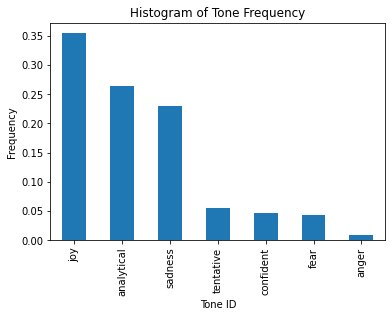

In [99]:
tone_lists = [t.split(", ") for t in tones_ids]
all_tones = [t for tones in tone_lists for t in tones]

num_speeches = len(tone_lists)
num_tone_predictions = len(all_tones)
print("Number of data points: {}".format(num_speeches))
print("Total number of tones: {}".format(num_tone_predictions))
print("Average number of significant tones predicted per speech: {}".format(num_tone_predictions/num_speeches))

num_empty = sum(1 for t in tones_ids if not t)
print("Number of speeches with no significantly detected tones: {}".format(num_empty))

all_tones_series = pd.Series(all_tones)
all_tones_series = all_tones_series[all_tones_series != ""]
tones_found = all_tones_series.unique()
print("")
print("All tones found: {}".format(tones_found))

all_tone_freqs = pd.DataFrame(data={
    "count" : all_tones_series.value_counts(),
    "frequency" : all_tones_series.value_counts(normalize=True)
})
print(all_tone_freqs)

ax = all_tone_freqs["frequency"].plot(
  kind = "bar",
  title = "Histogram of Tone Frequency"
)
ax.set_xlabel("Tone ID")
ax.set_ylabel("Frequency")